In [2]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

### Getting Dynamic Node and Dynamic Edge 1 Hr time window results

In [3]:
temp = pd.read_csv('./results/dn_de_1_hr/dynamic_node_dynamic_edge_1_hr_preds.csv')



In [4]:
def get_CM(y_true,y_pred,title,comment,path):
    test_acc = (y_pred == y_true).sum()/len(y_true)

    print(f"Accuracy {comment}:",test_acc)

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    _ = disp.plot(ax=ax)
    # Add a title to the plot
    ax.set_title(title + " - Real Count")
    # plt.savefig(f'{path}/CM_real_55_{comment}.jpg')
    plt.show()

    # Getting the percentage CM
    cm = ((cm * 100) / (cm.sum(axis=1)[:, np.newaxis]))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    _ = disp.plot(ax=ax)
    # Add a title to the plot
    ax.set_title(title + " - Percentages")
    # plt.savefig(f'{path}/CM_percentage_55{comment}.jpg')
    plt.show()

    return test_acc

Accuracy : 0.5162204038154263


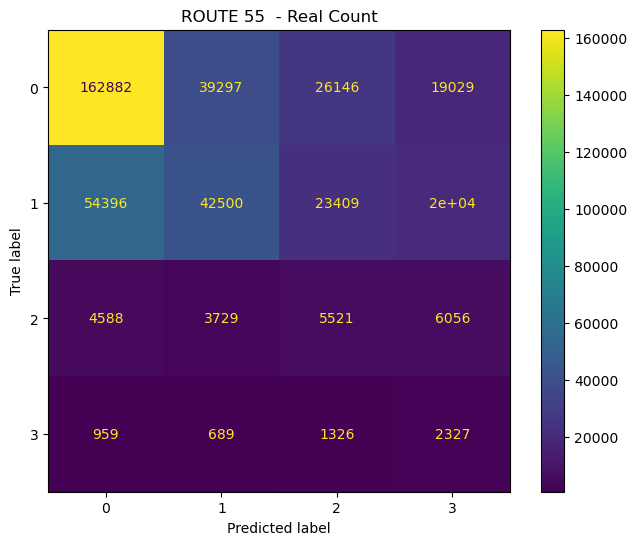

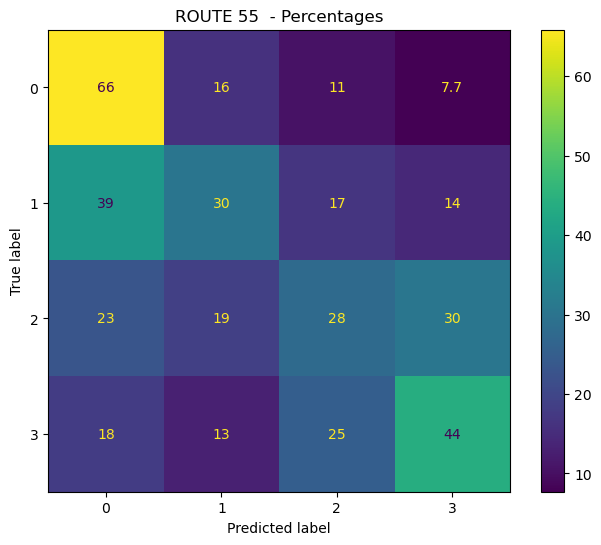

0.5162204038154263

In [5]:
get_CM(temp.ytrue,temp.ypred,'ROUTE 55 ','','curr_experiment_path')

In [6]:
temp = pd.read_csv('./results/dn_de_2_hr/dynamic_node_dynamic_edge_2_hr_preds.csv')



Accuracy : 0.4263707283178574


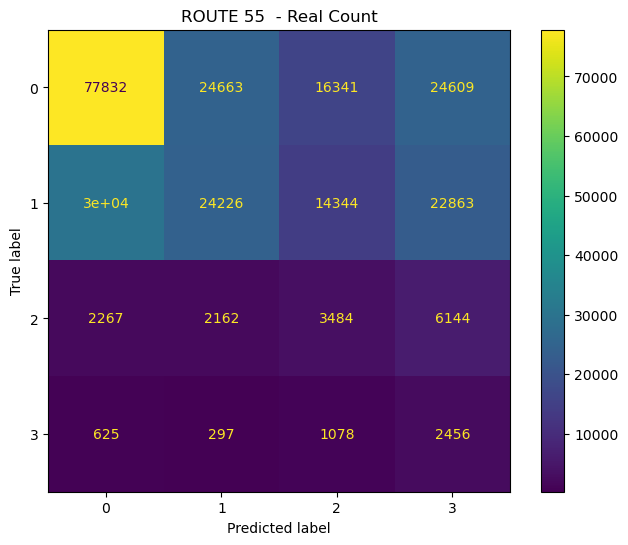

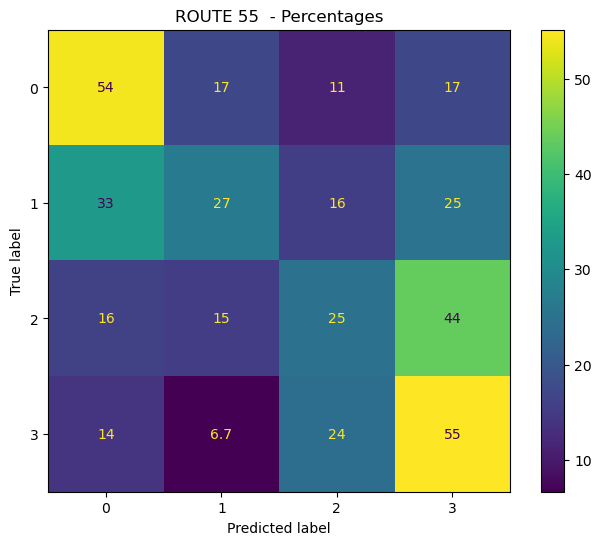

0.4263707283178574

In [7]:
get_CM(temp.ytrue,temp.ypred,'ROUTE 55 ','','curr_experiment_path')

### Static Node results

In [8]:
temp = pd.read_csv('/home/sgupta/WORK/Stoplevel_day_ahead_prediction/SNA_Project_static_graph/results/sn_de_1_hr/static_node_dynamic_edge_1_hr_preds.csv')

In [10]:
def get_CM(y_true,y_pred,title,comment,path):
    test_acc = (y_pred == y_true).sum()/len(y_true)

    print(f"Accuracy {comment}:",test_acc)

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    _ = disp.plot(ax=ax)
    # Add a title to the plot
    ax.set_title(title + " - Real Count")
    # plt.savefig(f'{path}/CM_real_55_{comment}.jpg')
    plt.show()

    # Getting the percentage CM
    cm = ((cm * 100) / (cm.sum(axis=1)[:, np.newaxis]))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    _ = disp.plot(ax=ax)
    # Add a title to the plot
    ax.set_title(title + " - Percentages")
    # plt.savefig(f'{path}/CM_percentage_55{comment}.jpg')
    plt.show()

    return test_acc

Accuracy with 4th bin: 0.8677734209110727


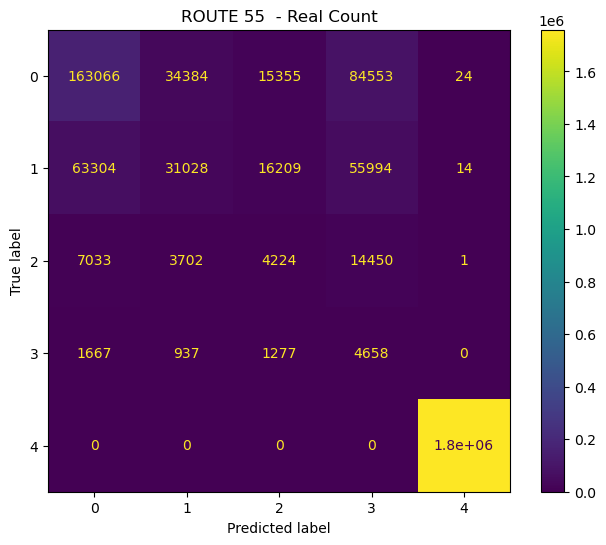

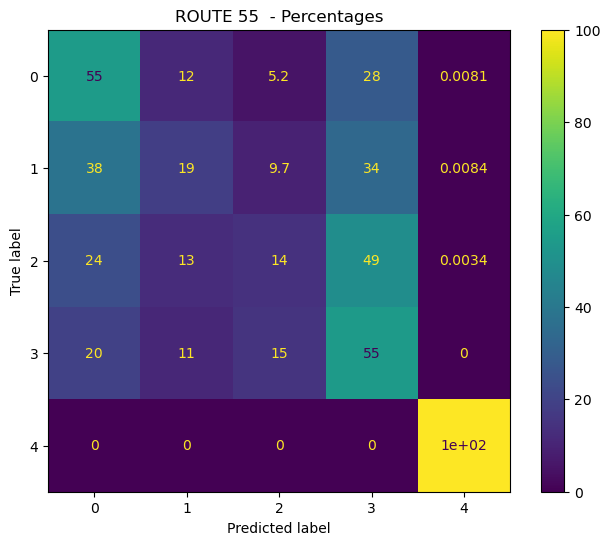

0.8677734209110727

In [11]:
get_CM(temp.ytrue,temp.ypred,'ROUTE 55 ','with 4th bin','curr_experiment_path')

In [16]:
temp2 = temp
temp2 = temp2[temp2.ytrue != 4]
temp2.reset_index(drop=True,inplace=True)
# test_acc_w_o_4th = get_CM(temp2.ytrue,temp2.ypred,'ROUTE 55 no 4th bin','without 4th bin','curr_experiment_path')


In [22]:
def accuracy_metric(y_true,y_pred):
        a = []
        
        for i in range(len(y_true)):
            yt = y_true[i]
            yp = y_pred[i]

            temp = 1 - (np.abs(yt-yp)/5)
            a.append(temp)
        # print(a)
        accuracy = sum(a)/len(y_true)

        return accuracy

custom_accuracy = accuracy_metric(temp2.ytrue,temp2.ypred)
print('Custom Accuracy Metric:',custom_accuracy)


Custom Accuracy Metric: 0.7805196461290649


In [20]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, support = precision_recall_fscore_support(temp2.ytrue,temp2.ypred, average='weighted')

/home/sgupta/anaconda3/envs/py39SAM/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
precision, recall, f1_score, support

(0.5651995010625281, 0.4044313381684865, 0.45836206683454417, None)